In [1]:
run src/preprocessing.ipynb

/home/jovyan
/home/jovyan/Walmart_Project


In [2]:
from sklearn.decomposition import PCA

pca_log_sc_out_rem = PCA()
pca_log_gel_out_rem = PCA()

pca_log_sc_out_rem.fit(numeric_train_log_sc_out_rem_df)
pca_log_gel_out_rem.fit(numeric_train_log_gel_out_rem_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### Based on the elbow curve we can see the PCA starts to level out at 3. 

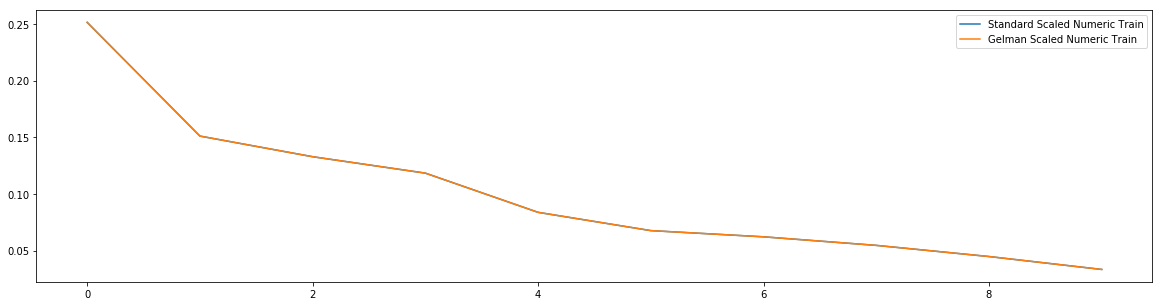

In [3]:
plt.figure(figsize=(20,5))
plt.plot(pca_log_sc_out_rem.explained_variance_ratio_, label = "Standard Scaled Numeric Train")
plt.plot(pca_log_gel_out_rem.explained_variance_ratio_, label = "Gelman Scaled Numeric Train")
plt.legend()

In [4]:
pca_log_sc_out_rem = PCA(3)
pca_log_gel_out_rem = PCA(3)

pca_log_sc_out_rem.fit(numeric_train_log_sc_out_rem_df)
pca_log_gel_out_rem.fit(numeric_train_log_gel_out_rem_df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [5]:
L_log_sc_out_rem = pca_log_sc_out_rem.explained_variance_ratio_
L_log_gel_out_rem = pca_log_gel_out_rem.explained_variance_ratio_

P_log_sc_out_rem = pd.DataFrame(pca_log_sc_out_rem.components_, columns = numeric_train_log_sc_out_rem_df.columns)
P_log_gel_out_rem = pd.DataFrame(pca_log_gel_out_rem.components_, columns = numeric_train_log_gel_out_rem_df.columns)

[Text(0,0,'PC 10.25'), Text(0,0,'PC 20.15'), Text(0,0,'PC 30.13')]

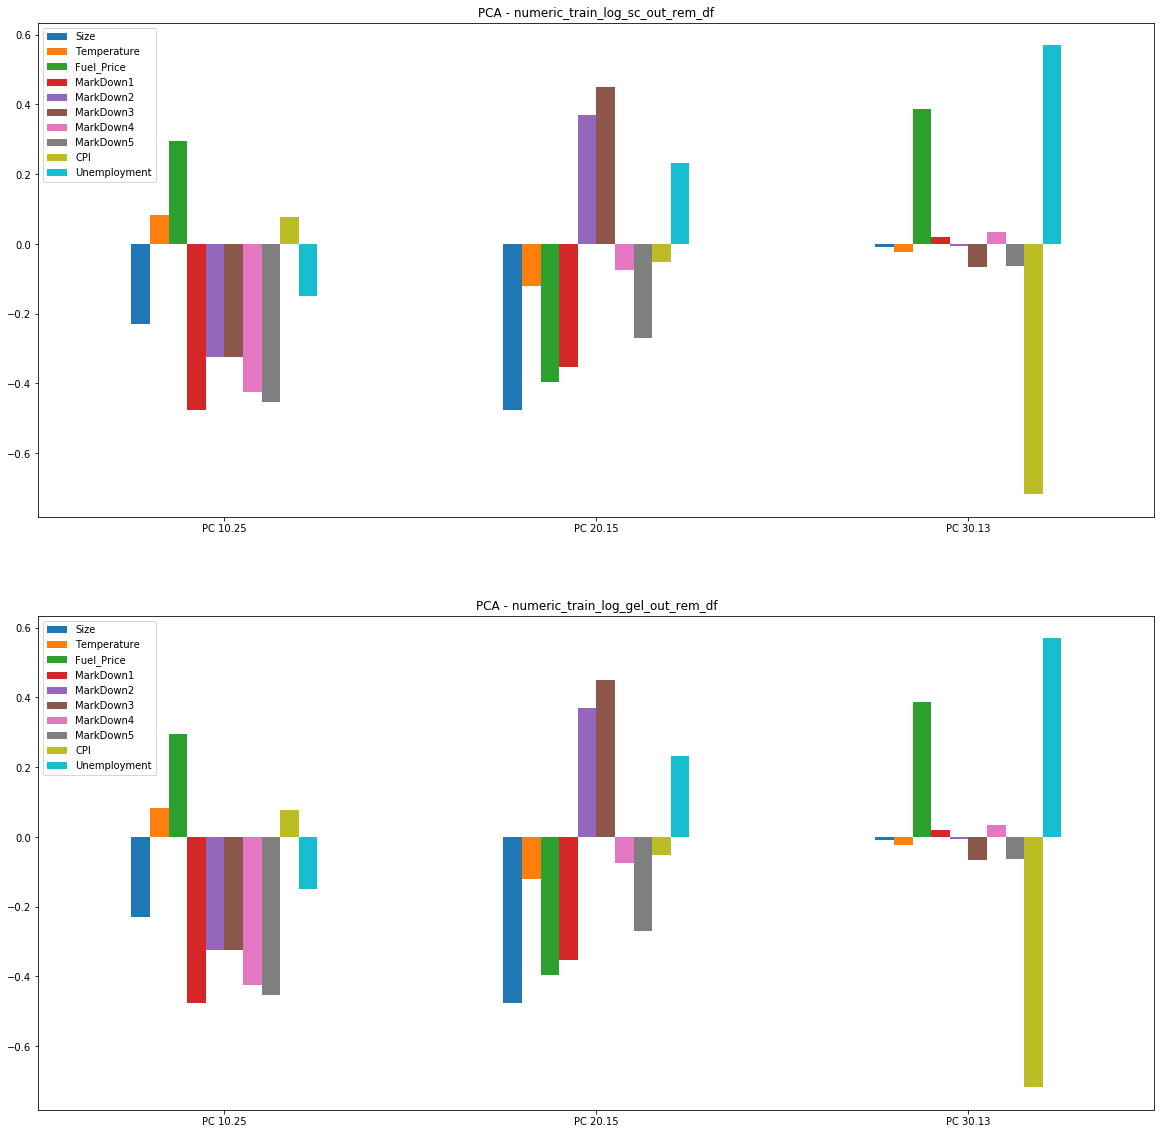

In [6]:
_, ax = plt.subplots(2,1, figsize=(20,20))

P_log_sc_out_rem.plot(kind="bar", rot=0, title="PCA - numeric_train_log_sc_out_rem_df", ax=ax[0])
P_log_gel_out_rem.plot(kind="bar", rot=0, title = "PCA - numeric_train_log_gel_out_rem_df", ax=ax[1])

ax[0].set_xticklabels(["PC " + str(i+1) + str(round(ratio,2)) for i, ratio in enumerate(L_log_sc_out_rem)])
ax[1].set_xticklabels(["PC " + str(i+1) + str(round(ratio,2)) for i, ratio in enumerate(L_log_gel_out_rem)])

In [7]:
numeric_train_log_sc_out_rem_pca_df = pd.DataFrame(pca_log_sc_out_rem.transform(numeric_train_log_sc_out_rem_df), 
                                                     columns = ["PC 1", "PC 2", "PC 3"], index=numeric_train_log_sc_out_rem_df.index)
numeric_train_log_gel_out_rem_pca_df = pd.DataFrame(pca_log_gel_out_rem.transform(numeric_train_log_gel_out_rem_df), 
                                                     columns = ["PC 1", "PC 2", "PC 3"], index=numeric_train_log_gel_out_rem_df.index)
numeric_test_log_sc_pca_df = pd.DataFrame(pca_log_sc_out_rem.transform(numeric_test_log_sc_df),
                                                     columns = ["PC 1", "PC 2", "PC 3"], index=numeric_test_log_sc_df.index)
numeric_test_log_gel_pca_df = pd.DataFrame(pca_log_gel_out_rem.transform(numeric_test_log_gel_df),
                                                     columns = ["PC 1", "PC 2", "PC 3"], index=numeric_test_log_gel_df.index)

In [8]:
numeric_test_log_sc_pca_df .head()

PC 1        PC 2        PC 3
0  356.955457 -469.980033  709.303633
1  356.955457 -469.980033  709.303633
2  356.955457 -469.980033  709.303633
3  356.955457 -469.980033  709.303633
4  356.955457 -469.980033  709.303633

In [9]:
#Standard Scaled Dataset
trainset_1 = pd.merge(categorical_train_encoded_sig_out_rem_df, numeric_train_log_sc_out_rem_df, left_index=True, right_index=True)
trainset_2 = pd.merge(trainset_1, numeric_train_log_sc_out_rem_pca_df, left_index=True, right_index=True)
testset_1 = pd.merge(numeric_test_log_sc_df, categorical_test_encoded_sig_df, left_index=True, right_index=True)
testset_2 = pd.merge(testset_1, numeric_test_log_sc_pca_df, left_index=True, right_index=True)
target_1 = target_out_rem
target_2 = target_out_rem

### Check the shapes. 
### 1) Target row and trainset must match
### 2) Train and Test dataset must have matching columns

In [10]:
trainset_1.shape

(421427, 15)

In [11]:
trainset_2.shape

(421427, 18)

In [12]:
target_1.shape

(421427,)

In [13]:
testset_1.shape

(115064, 15)

In [14]:
testset_2.shape

(115064, 18)